In [1]:
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm

%matplotlib inline

#from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

from mpl_toolkits.mplot3d import Axes3D

import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing
import math

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
cs_dforg=pd.read_csv('E:\\MLData\\ZorluFaturalar2802_V2.csv')
cs_dforg.rename(columns={'BILL_NUM':'InvoiceNo','ZTMTERIAL':'StockCode','BILL_QTY':'Quantity', 'DATE':'InvoiceDate',
                      'NET_VAL':'UnitPrice','ZTCSTMR2':'CustomerID'},inplace=True)
cs_dforg.head(10)


CustomerID   InvoiceNo  CALMONTH StockCode InvoiceDate  DAYOFWEEK  HOLIDAY  \
0   10205620  6911637731    201801  71067016  2018-01-27          5        0   
1   10204300  6911637839    201801  71067016  2018-01-27          5        0   
2   10205208  6911638027    201801  71067016  2018-01-27          5        0   
3   10205066  6911638127    201801  71067016  2018-01-27          5        0   
4   10205980  6911638188    201801  71067016  2018-01-27          5        0   
5   10205620  6911638239    201801  71067016  2018-01-27          5        0   
6   10205546  6911638344    201801  71067016  2018-01-27          5        0   
7   10204216  6911638430    201801  71067016  2018-01-27          5        0   
8   10205630  6911638454    201801  71067016  2018-01-27          5        0   
9   10206030  6911638617    201801  71067016  2018-01-27          5        0   

   WEEKEND  ZSMMDGR  NETVAL_INV  Quantity  INV_QTY  SUM(SUBTOTAL_6)  OPEN  \
0        1     5.76       10.09       1.0      1.0              0.0     1   
1        1     5.76       10.09       1.0      1.0              0.0     1   
2        1     5.76       10.09       1.0      1.0              0.0     1   
3        1     5.76       10.09       1.0      1.0              0.0     1   
4        1     5.76       10.09       1.0      1.0              0.0     1   
5        1     5.76       10.09       1.0      1.0              0.0     1   
6        1     5.76       10.09       1.0      1.0              0.0     1   
7        1     5.76       10.09       1.0      1.0              0.0     1   
8        1     5.76       10.09       1.0      1.0              0.0     1   
9        1     5.76       10.09       1.0      1.0              0.0     1   

   PROMO  
0      1  
1      1  
2      1  
3      1  
4      1  
5      1  
6      1  
7      1  
8      1  
9      1

In [3]:
dfmagaza = pd.read_csv("E:\\MLdata\MAGAZADETAY0912.csv",encoding='utf-8',delimiter=',',dtype={'Hesap No': str})
dfmagaza=dfmagaza.sort_values('Mağaza Adı')
dfmagaza.head(10)
#dfmagaza['Mağaza Adı'].head(5)

Id                       Mağaza Adı Mağaza Kodu Adres Kodu  Hesap No  \
647  100576                      AB-KA ÇEYİZ         YOK   20107131  10203658   
67     6591                      AB-KA ÇEYİZ      300140   20103780       YOK   
690  100619  ABDULBAKİ KAÇMAZ - KAÇMAZ PERDE         YOK   20107652  10207420   
725  100670     ABDURRAHMAN KAHRAMAN (HAVUZ)         YOK   20107526  10207225   
783  100728    ABİDİN ÜNSAL-ÜNSALLAR PERDE           YOK   20105048  10204623   
243   10215   ACAR KARDEŞLER TARABYA 1. ŞUBE      300267   20103211       YOK   
87     6632            ACARLAR PERDE & ÇEYİZ      300213   20103517       YOK   
602  100529                 ACIBADEM  LİNENS         YOK   20107479  10207005   
572  100488                       ACUN PERDE         YOK   20106744  10206465   
78     6616                    AD-İS TEKSTİL      300170   20103669       YOK   

     Cari Kod   Marka      Mağaza Grubu   Mağaza Statü  Regüle  ...  \
647  10203658     TAC              Bayi  Belirtilmemiş       0  ...   
67        YOK     TAC              Bayi  Belirtilmemiş       0  ...   
690  10207420     TAC              Bayi  Belirtilmemiş       0  ...   
725  10207225     TAC              Bayi  Belirtilmemiş       0  ...   
783  10204623     TAC              Bayi  Belirtilmemiş       0  ...   
243       YOK     TAC              Bayi  Belirtilmemiş       0  ...   
87        YOK     TAC              Bayi  Belirtilmemiş       0  ...   
602  10207005  LINENS  Merkez Mağazalar         Regüle       1  ...   
572  10206465     TAC              Bayi  Belirtilmemiş       0  ...   
78        YOK     TAC              Bayi  Belirtilmemiş       0  ...   

                           E-Posta Enlem Boylam Yüzölçümü (m2)  \
647        abkatekstil@tacbayi.com   NaN    NaN            NaN   
67         abkatekstil@tacbayi.com   NaN    NaN            NaN   
690    abdulbakikacmaz@hotmail.com   NaN    NaN            NaN   
725  kahramantekstil35@hotmail.com   NaN    NaN            NaN   
783      unsallarltd01@hotmail.com   NaN    NaN            NaN   
243       acar1tekstil@tacbayi.com   NaN    NaN            NaN   
87        acarlarperde@tacbayi.com   NaN    NaN            NaN   
602                            NaN   NaN    NaN            NaN   
572        ayhanacun25@hotmail.com   NaN    NaN            NaN   
78         adistekstil@tacbayi.com   NaN    NaN            NaN   

     Perde Alanı (m2) Bölge Sorumlusu Mağaza Müdürü          IL CITYCODE1  \
647               NaN             NaN           NaN   GAZIANTEP      27.0   
67                NaN             NaN           NaN   GAZIANTEP      27.0   
690               NaN             NaN           NaN  DIYARBAKIR      21.0   
725               NaN             NaN           NaN       İZMIR      35.0   
783               NaN             NaN           NaN       ADANA       1.0   
243               NaN             NaN           NaN    İSTANBUL      34.0   
87                NaN             NaN           NaN      BARTIN      74.0   
602               NaN  Turgut Fenerci           NaN    İSTANBUL      34.0   
572               NaN             NaN           NaN       İZMIR      35.0   
78                NaN             NaN           NaN    İSTANBUL      34.0   

    CITYCODE2  
647      27.0  
67       27.0  
690      21.0  
725      35.0  
783       1.0  
243      34.0  
87       74.0  
602      34.0  
572      35.0  
78       34.0  

[10 rows x 31 columns]

In [4]:
# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

#dflist = pd.DataFrame(

menu = widgets.Dropdown(
       #options={'a': 1},value=1,
       options=(dfmagaza['Mağaza Adı'] + ' ### ' + dfmagaza['Hesap No']).unique(),
      # value=('Konya Novada Linens'+ '-' +'10205630'),
       description='Mağaza:')

box = widgets.VBox([menu])
box

In [62]:
print(menu.value.split(' ### ')[1])
#cs_df=cs_dforg.copy()
cs_df=cs_dforg[(cs_dforg['CustomerID']=="00" + menu.value.split(' ### ')[1])]
cs_df.head(15)

10205406


CustomerID   InvoiceNo  CALMONTH StockCode InvoiceDate  DAYOFWEEK  \
131275  0010205406  6912508933    201808  71210901  2018-08-30          3   
131319  0010205406  6912555599    201809  71210901  2018-09-12          2   
131591  0010205406  6912366489    201807  71226288  2018-07-24          1   
131613  0010205406  6912459312    201808  71226288  2018-08-14          1   
133612  0010205406  6912557050    201809  71127445  2018-09-12          2   
134794  0010205406  6912295159    201807  71210486  2018-07-03          1   
134837  0010205406  6912498714    201808  71210486  2018-08-26          6   
134854  0010205406  6912562967    201809  71210486  2018-09-14          4   
136058  0010205406  6912561055    201809  60166148  2018-09-13          3   
136356  0010205406  6912365322    201807  60166148  2018-07-23          0   
136410  0010205406  6912539313    201809  60179911  2018-09-08          5   
136770  0010205406  6912301750    201807  60179911  2018-07-06          4   
136844  0010205406  6912572894    201809  60179911  2018-09-17          0   
136915  0010205406  6912726184    201811  60179911  2018-11-02          4   
137562  0010205406  6912439425    201808  71210899  2018-08-10          4   

        HOLIDAY  WEEKEND  ZSMMDGR  NETVAL_INV  Quantity  INV_QTY  \
131275        1        0    11.74       32.31       1.0      1.0   
131319        0        0    11.74       32.31       1.0      1.0   
131591        0        0    12.80       30.51       4.0      4.0   
131613        0        0    12.80       33.90       4.0      4.0   
133612        0        0    13.04       24.91       1.0      1.0   
134794        0        0     7.01       16.10       1.0      1.0   
134837        0        1     7.01       25.42       1.0      1.0   
134854        0        0     7.01       25.42       1.0      1.0   
136058        0        0   128.44      360.20       1.0      1.0   
136356        0        0   119.16      276.86       1.0      1.0   
136410        0        1    24.10       59.17       1.0      1.0   
136770        0        0    24.10       43.43       1.0      1.0   
136844        0        0    24.10       59.16       1.0      1.0   
136915        0        0    24.10       52.42       1.0      1.0   
137562        0        0    22.84       55.37       2.0      2.0   

        SUM(SUBTOTAL_6)  OPEN  PROMO  
131275              0.0     1      1  
131319              0.0     1      1  
131591              0.0     1      1  
131613              0.0     1      1  
133612              0.0     1      1  
134794              0.0     1      1  
134837              0.0     1      1  
134854              0.0     1      1  
136058              0.0     1      1  
136356              0.0     1      1  
136410              0.0     1      1  
136770              0.0     1      1  
136844              0.0     1      1  
136915              0.0     1      1  
137562              0.0     1      1

In [63]:
   cs_df.head()

CustomerID   InvoiceNo  CALMONTH StockCode InvoiceDate  DAYOFWEEK  \
131275  0010205406  6912508933    201808  71210901  2018-08-30          3   
131319  0010205406  6912555599    201809  71210901  2018-09-12          2   
131591  0010205406  6912366489    201807  71226288  2018-07-24          1   
131613  0010205406  6912459312    201808  71226288  2018-08-14          1   
133612  0010205406  6912557050    201809  71127445  2018-09-12          2   

        HOLIDAY  WEEKEND  ZSMMDGR  NETVAL_INV  Quantity  INV_QTY  \
131275        1        0    11.74       32.31       1.0      1.0   
131319        0        0    11.74       32.31       1.0      1.0   
131591        0        0    12.80       30.51       4.0      4.0   
131613        0        0    12.80       33.90       4.0      4.0   
133612        0        0    13.04       24.91       1.0      1.0   

        SUM(SUBTOTAL_6)  OPEN  PROMO  
131275              0.0     1      1  
131319              0.0     1      1  
131591              0.0     1      1  
131613              0.0     1      1  
133612              0.0     1      1

ZSMMDGR
NETVAL_INV
Quantity
INV_QTY
SUM(SUBTOTAL_6)


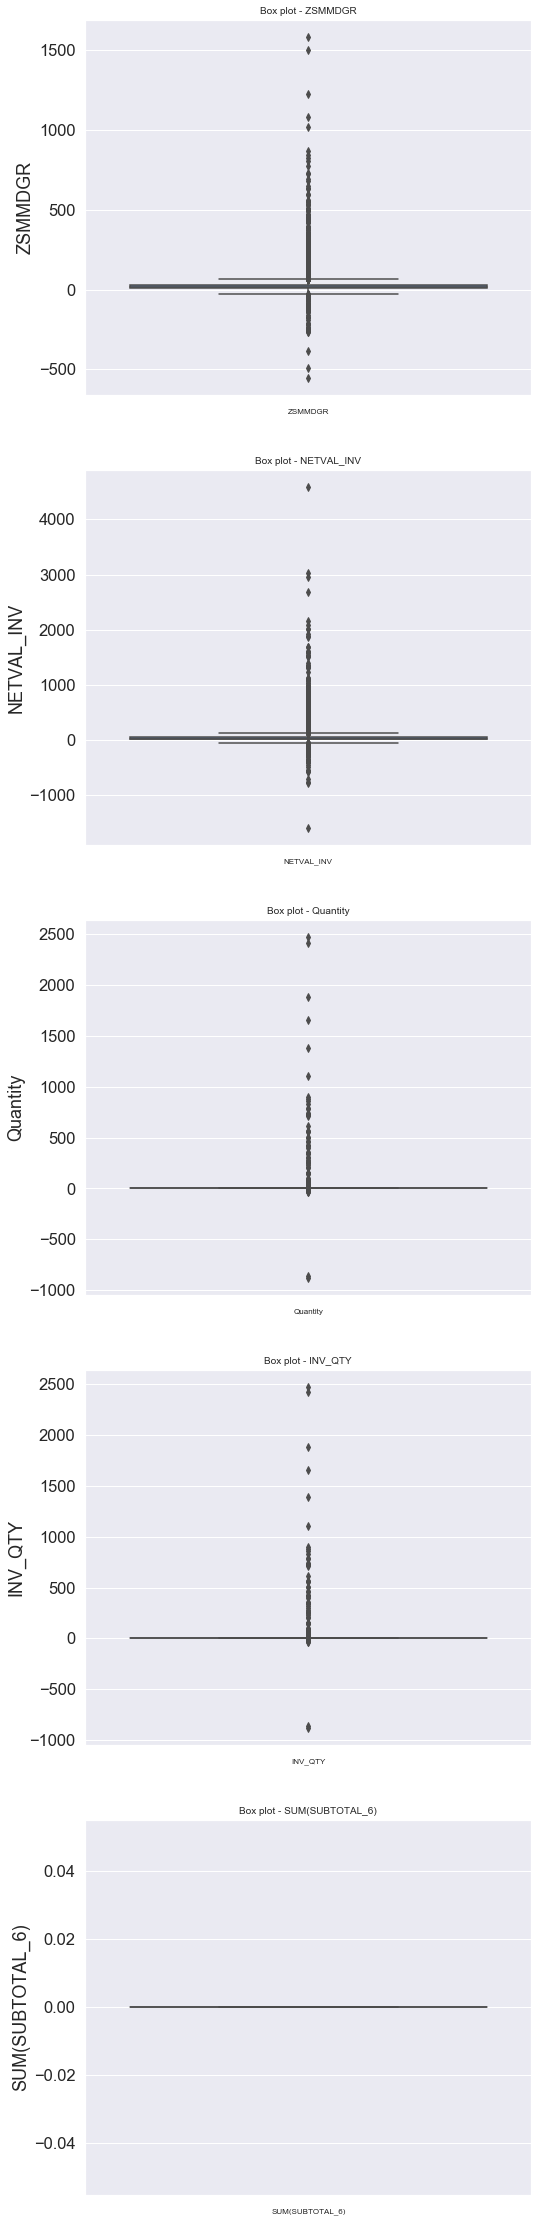

In [64]:
col_names = ['ZSMMDGR','NETVAL_INV', 'Quantity', 'INV_QTY', 'SUM(SUBTOTAL_6)']
#col_names = ['ZSMMDGR']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=cs_df[col_val], ax=ax[i])
    print(col_val)
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [65]:
for i, col_val in enumerate(col_names):
    print(col_val)

ZSMMDGR
NETVAL_INV
Quantity
INV_QTY
SUM(SUBTOTAL_6)


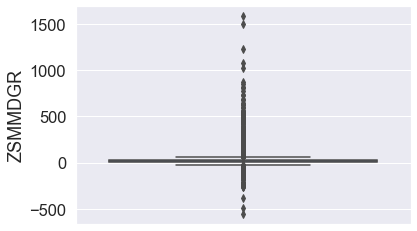

In [66]:
#fig, ax = plt.subplots(121, figsize=(8,40))
ax=sns.boxplot(y=cs_df['ZSMMDGR'])
#plt.show()

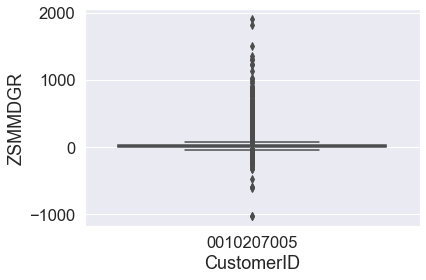

In [20]:
ax = sns.boxplot(x="CustomerID", y="ZSMMDGR", data=cs_df)

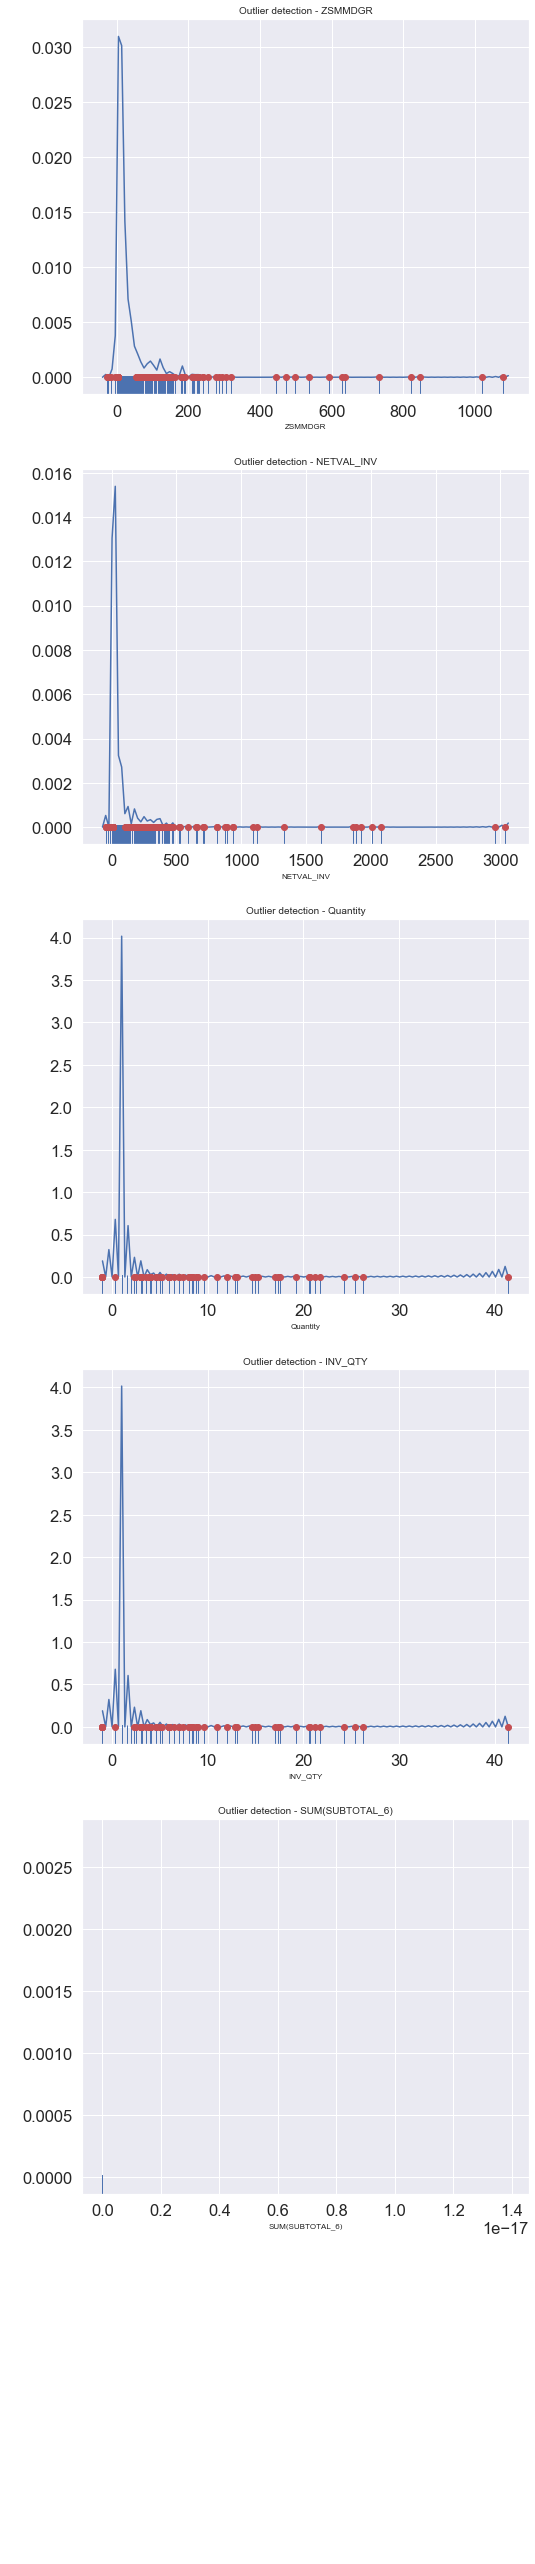

In [67]:
def percentile_based_outlier(data, threshold=70):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

#col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = cs_df[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [68]:

dfMAGAZADETAY = pd.read_csv("E:\MLdata\MAGAZADETAY0912.csv",encoding='utf-8',delimiter=',')

dfMAGAZADETAY = dfMAGAZADETAY [['Id','Cari Kod', 'Mağaza Adı', 'Mağaza Kodu',
       'Adres Kodu', 'Hesap No', 'Marka', 'Mağaza Grubu', 'Mağaza Statü',
       'Regüle', 'Outlet', 'Yerleşim Türü', 'Bölge', 'Açılış Tarihi',
       'Kapanış Tarihi', 'Ülke', 'İl', 'İlçe', 'Enlem', 'Boylam', 'Yüzölçümü (m2)', 'Perde Alanı (m2)',
       'IL', 'CITYCODE2']]
    
dfMAGAZADETAY.rename(columns={"Cari Kod": "CustomerID"},inplace=True)
dfMAGAZADETAY['CustomerID']='00'+dfMAGAZADETAY['CustomerID']
dfMAGAZADETAY.rename(columns={"CITYCODE2": "City"},inplace=True)

cs_df=cs_df.merge(dfMAGAZADETAY,on='CustomerID', how='left')
cs_df=cs_df[(cs_df['Mağaza Grubu']=='Merkez Mağazalar')]


In [69]:

def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1, sort=True)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=True)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str


In [57]:

details = rstr(cs_df)
display(details.sort_values(by='missing ration', ascending=False))


cs_df.InvoiceDate = pd.to_datetime(cs_df.InvoiceDate)
#cs_df['amount'] = cs_df.Quantity*cs_df.UnitPrice
cs_df.CustomerID = cs_df.CustomerID.astype('str')



Data shape: (5064, 38)
___________________________
Data types:
 object     17
float64    11
int64      10
Name: types, dtype: int64
___________________________


types  counts  distincts  nulls  missing ration  \
Kapanış Tarihi    float64       0          1   5064           100.0   
Perde Alanı (m2)  float64       0          1   5064           100.0   
Adres Kodu         object    5064          1      0             0.0   
Regüle              int64    5064          1      0             0.0   
NETVAL_INV        float64    5064       2151      0             0.0   
OPEN                int64    5064          1      0             0.0   
Outlet              int64    5064          1      0             0.0   
PROMO               int64    5064          1      0             0.0   
Quantity          float64    5064        101      0             0.0   
SUM(SUBTOTAL_6)   float64    5064          1      0             0.0   
Mağaza Kodu        object    5064          1      0             0.0   
StockCode          object    5064       1380      0             0.0   
WEEKEND             int64    5064          2      0             0.0   
Yerleşim Türü      object    5064          1      0             0.0   
Yüzölçümü (m2)    float64    5064          1      0             0.0   
ZSMMDGR           float64    5064       2398      0             0.0   
Ülke               object    5064          1      0             0.0   
İl                 object    5064          1      0             0.0   
Mağaza Statü       object    5064          1      0             0.0   
Mağaza Grubu       object    5064          1      0             0.0   
Açılış Tarihi      object    5064          1      0             0.0   
Mağaza Adı         object    5064          1      0             0.0   
Boylam            float64    5064          1      0             0.0   
Bölge              object    5064          1      0             0.0   
CALMONTH            int64    5064         26      0             0.0   
City              float64    5064          1      0             0.0   
CustomerID         object    5064          1      0             0.0   
DAYOFWEEK           int64    5064          7      0             0.0   
Enlem             float64    5064          1      0             0.0   
HOLIDAY             int64    5064          2      0             0.0   
Hesap No           object    5064          1      0             0.0   
IL                 object    5064          1      0             0.0   
INV_QTY           float64    5064        101      0             0.0   
Id                  int64    5064          1      0             0.0   
InvoiceDate        object    5064        644      0             0.0   
InvoiceNo           int64    5064       1671      0             0.0   
Marka              object    5064          1      0             0.0   
İlçe               object    5064          1      0             0.0   

                                                            uniques  skewness  \
Kapanış Tarihi                                              [[nan]]       NaN   
Perde Alanı (m2)                                            [[nan]]       NaN   
Adres Kodu                                             [[20106730]]  0.000000   
Regüle                                                        [[1]]  0.000000   
NETVAL_INV        [[22.09, 16.19, 13.99, 81.73, 294.52, 228.25, ...  2.857343   
OPEN                                                          [[1]]  0.000000   
Outlet                                                        [[0]]  0.000000   
PROMO                                                         [[1]]  0.000000   
Quantity          [[1.0, 2.0, 4.0, 5.4, 12.5, 24.0, 7.5, 12.7, 9...  1.093237   
SUM(SUBTOTAL_6)                                             [[0.0]]  0.000000   
Mağaza Kodu                                               [[03460]]  0.000000   
StockCode         [[71067311, 71067298, 71079137, 60144258, 6014... -2.211544   
WEEKEND                                                    [[0, 1]]  1.545617   
Yerleşim Türü                                               [[AVM]]       NaN   
Yüzölçümü (m2)                     

In [70]:
details = rstr(cs_df)
display(details.sort_values(by='distincts', ascending=False))

Data shape: (6817, 38)
___________________________
Data types:
 object     17
float64    11
int64      10
Name: types, dtype: int64
___________________________


types  counts  distincts  nulls  missing ration  \
InvoiceNo           int64    6817       3497      0             0.0   
StockCode          object    6817       2890      0             0.0   
ZSMMDGR           float64    6817       2632      0             0.0   
NETVAL_INV        float64    6817       1866      0             0.0   
InvoiceDate        object    6817        306      0             0.0   
Quantity          float64    6817        295      0             0.0   
INV_QTY           float64    6817        295      0             0.0   
CALMONTH            int64    6817         11      0             0.0   
DAYOFWEEK           int64    6817          7      0             0.0   
HOLIDAY             int64    6817          2      0             0.0   
WEEKEND             int64    6817          2      0             0.0   
Outlet              int64    6817          1      0             0.0   
PROMO               int64    6817          1      0             0.0   
Perde Alanı (m2)  float64    6817          1      0             0.0   
Regüle              int64    6817          1      0             0.0   
Adres Kodu         object    6817          1      0             0.0   
SUM(SUBTOTAL_6)   float64    6817          1      0             0.0   
Yerleşim Türü      object    6817          1      0             0.0   
Yüzölçümü (m2)    float64    6817          1      0             0.0   
Ülke               object    6817          1      0             0.0   
İl                 object    6817          1      0             0.0   
OPEN                int64    6817          1      0             0.0   
Mağaza Grubu       object    6817          1      0             0.0   
Mağaza Statü       object    6817          1      0             0.0   
Mağaza Kodu        object    6817          1      0             0.0   
Açılış Tarihi      object    6817          1      0             0.0   
Mağaza Adı         object    6817          1      0             0.0   
Marka              object    6817          1      0             0.0   
Kapanış Tarihi    float64       0          1   6817           100.0   
Id                  int64    6817          1      0             0.0   
IL                 object    6817          1      0             0.0   
Hesap No           object    6817          1      0             0.0   
Enlem             float64    6817          1      0             0.0   
CustomerID         object    6817          1      0             0.0   
City              float64    6817          1      0             0.0   
Bölge              object    6817          1      0             0.0   
Boylam            float64    6817          1      0             0.0   
İlçe               object    6817          1      0             0.0   

                                                            uniques  \
InvoiceNo         [[6912508933, 6912555599, 6912366489, 69124593...   
StockCode         [[71210901, 71226288, 71127445, 71210486, 6016...   
ZSMMDGR           [[11.74, 12.8, 13.04, 7.01, 128.44, 119.16, 24...   
NETVAL_INV        [[32.31, 30.51, 33.9, 24.91, 16.1, 25.42, 360....   
InvoiceDate       [[2018-08-30, 2018-09-12, 2018-07-24, 2018-08-...   
Quantity          [[1.0, 4.0, 2.0, 6.0, 3.0, -1.0, 4.6, 5.0, 26....   
INV_QTY           [[1.0, 4.0, 2.0, 6.0, 3.0, -1.0, 4.6, 5.0, 26....   
CALMONTH          [[201808, 201809, 201807, 201811, 201810, 2018...   
DAYOFWEEK                                   [[3, 2, 1, 6, 4, 0, 5]]   
HOLIDAY                                                    [[1, 0]]   
WEEKEND                                                    [[0, 1]]   
Outlet                                                        [[1]]   
PROMO                                                         [[1]]   
Perde Alanı (m2)                                           [[25.0]]   
Regüle                                                        [[1]]   
Adres Kodu                                             [[20105551]]   
SUM(SUBTOTAL_6)                            

In [72]:

refrence_date = cs_df.InvoiceDate.max() + datetime.timedelta(days = 1)
print('Reference Date:', refrence_date)
cs_df['days_since_last_purchase'] = (refrence_date - cs_df.InvoiceDate).astype('timedelta64[D]')
customer_history_df =  cs_df[['CustomerID', 'days_since_last_purchase']].groupby("CustomerID").min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase':'recency'}, inplace=True)
customer_history_df.describe().transpose()


TypeError: must be str, not datetime.timedelta

ValueError: `dataset` input should have multiple elements.

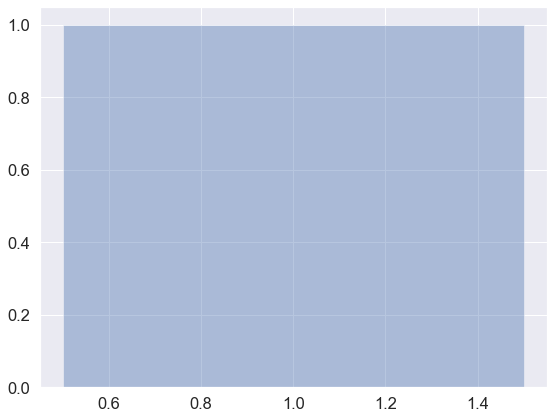

In [60]:


def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

QQ_plot(customer_history_df.recency, 'Recency')

ValueError: `dataset` input should have multiple elements.

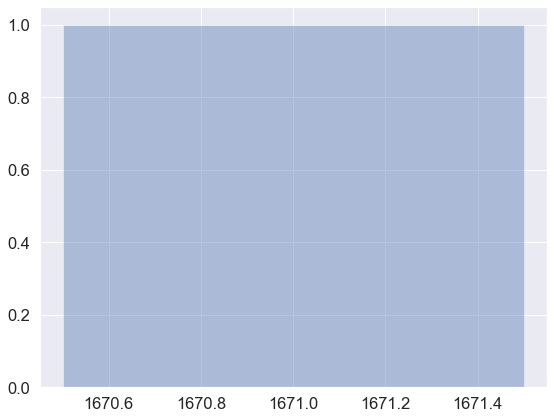

In [61]:
customer_freq = (cs_df[['CustomerID', 'InvoiceNo']].groupby(["CustomerID", 'InvoiceNo']).count().reset_index()).\
                groupby(["CustomerID"]).count().reset_index()
customer_freq.rename(columns={'InvoiceNo':'frequency'},inplace=True)
customer_history_df = customer_history_df.merge(customer_freq)
QQ_plot(customer_history_df.frequency, 'Frequency')


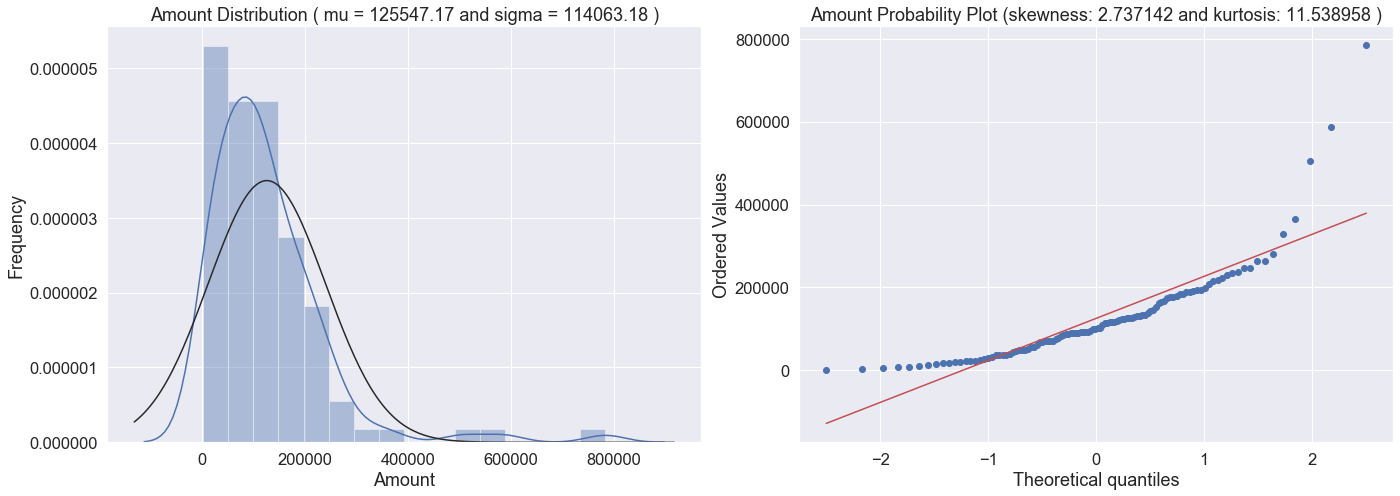

In [14]:


customer_monetary_val = cs_df[['CustomerID', 'Quantity']].groupby("CustomerID").sum().reset_index()
customer_history_df = customer_history_df.merge(customer_monetary_val)
QQ_plot(customer_history_df.Quantity, 'Amount')

In [16]:
customer_history_df.describe()

recency     frequency      Quantity
count  112.000000    112.000000     112.00000
mean   102.633929  20374.321429  125547.16625
std    208.424420  14023.281062  114575.82879
min      1.000000    130.000000    1387.01000
25%      1.000000   8968.500000   50127.32500
50%      1.000000  19261.500000  100729.21500
75%      1.250000  27360.000000  174951.13250
max    759.000000  77997.000000  784077.27000

In [18]:
customer_history_df['recency_log'] = customer_history_df['recency'].apply(math.log)
customer_history_df['frequency_log'] = customer_history_df['frequency'].apply(math.log)
customer_history_df['amount_log'] = customer_history_df['Quantity'].apply(math.log)
feature_vector = ['amount_log', 'recency_log','frequency_log']
X_subset = customer_history_df[feature_vector] #.as_matrix()
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
pd.DataFrame(X_scaled, columns=X_subset.columns).describe().T

count          mean       std       min       25%       50%  \
amount_log     112.0  1.790235e-15  1.004494 -3.922140 -0.486358  0.181952   
recency_log    112.0  6.938894e-17  1.004494 -0.552065 -0.552065 -0.552065   
frequency_log  112.0  1.827903e-15  1.004494 -4.650172 -0.474836  0.279045   

                    75%       max  
amount_log     0.710747  2.147351  
recency_log   -0.483248  2.081666  
frequency_log  0.625117  1.658270

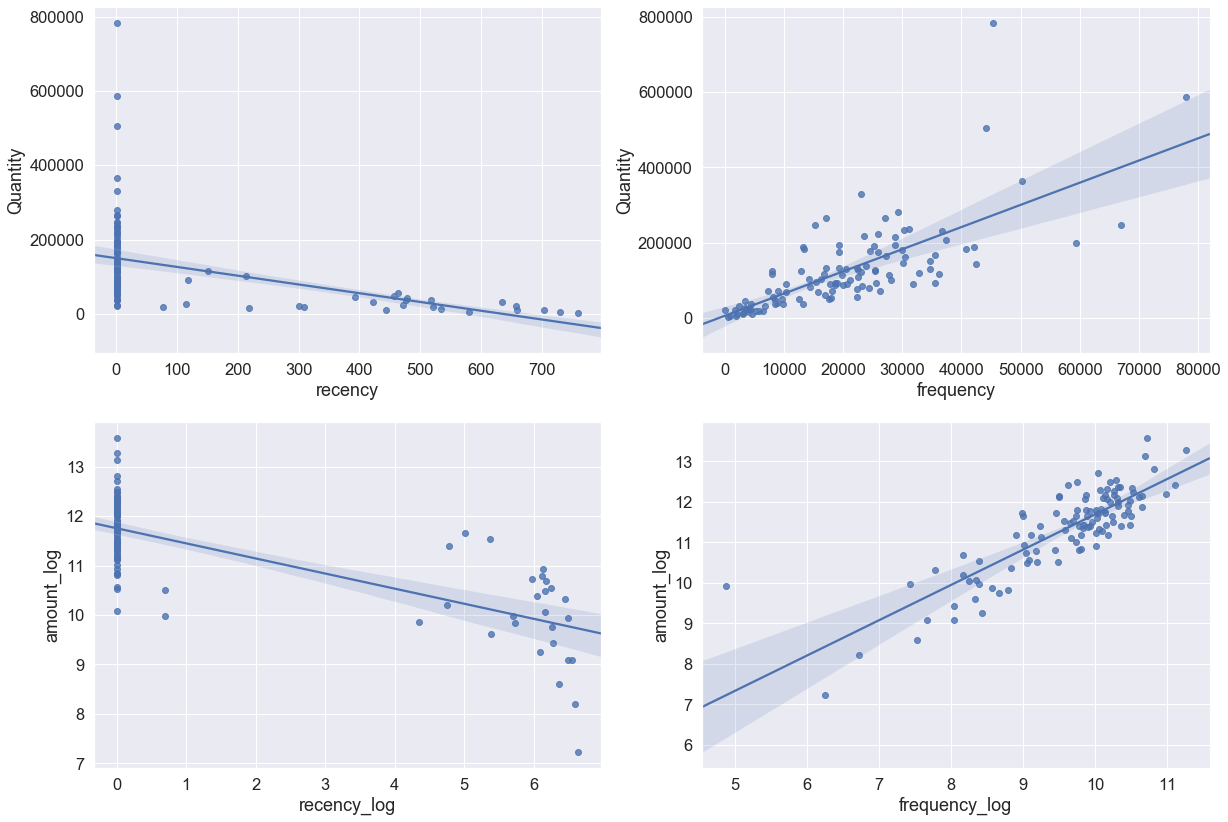

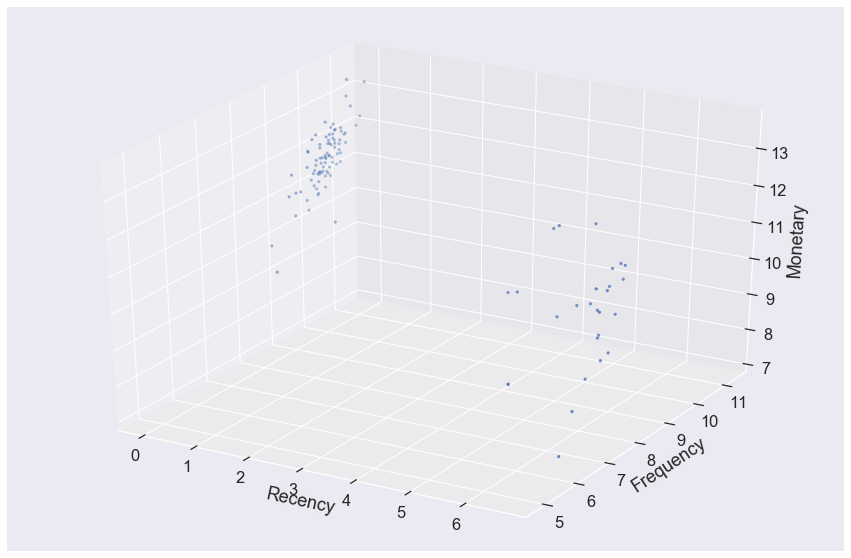

In [20]:
fig = plt.figure(figsize=(20,14))
f1 = fig.add_subplot(221); sns.regplot(x='recency', y='Quantity', data=customer_history_df)
f1 = fig.add_subplot(222); sns.regplot(x='frequency', y='Quantity', data=customer_history_df)
f1 = fig.add_subplot(223); sns.regplot(x='recency_log', y='amount_log', data=customer_history_df)
f1 = fig.add_subplot(224); sns.regplot(x='frequency_log', y='amount_log', data=customer_history_df)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs =customer_history_df.recency_log
ys = customer_history_df.frequency_log
zs = customer_history_df.amount_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

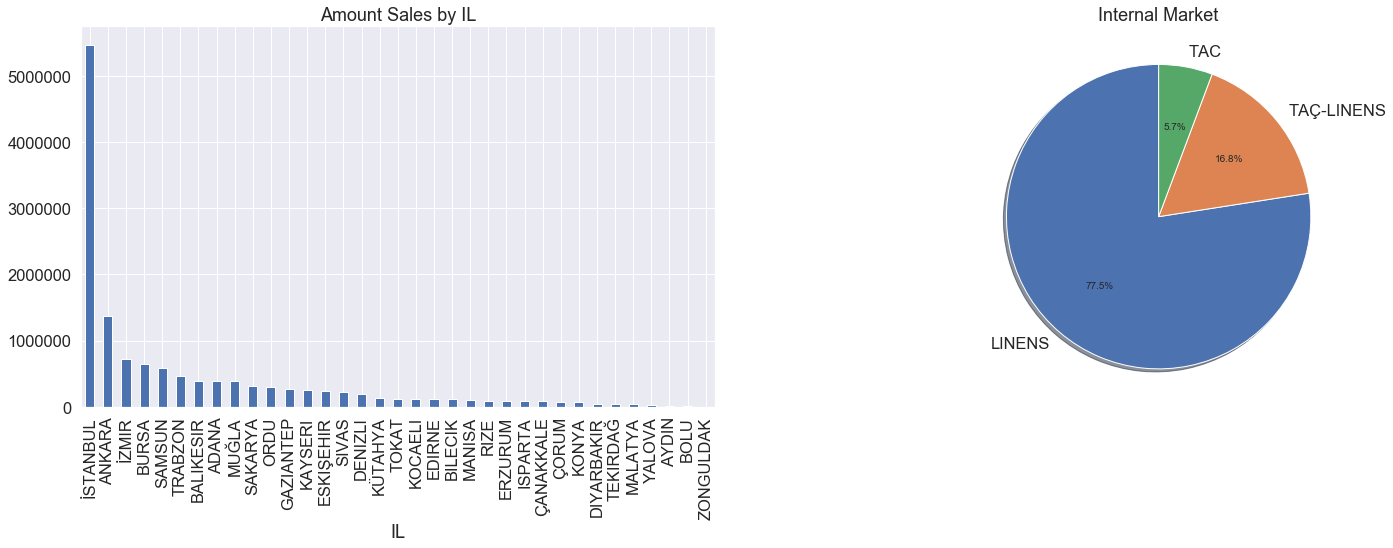

In [9]:
fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
g = cs_df.groupby(["IL"]).Quantity.sum().sort_values(ascending = False).plot(kind='bar', title='Amount Sales by IL')
cs_df['Internal'] = cs_df['Marka'].apply(lambda x: 'Yes' if x=='LINENS' else 'No' )

f2 = fig.add_subplot(122)
market = cs_df.groupby(["Marka"]).Quantity.sum().sort_values(ascending = False)
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Internal Market')
plt.show()


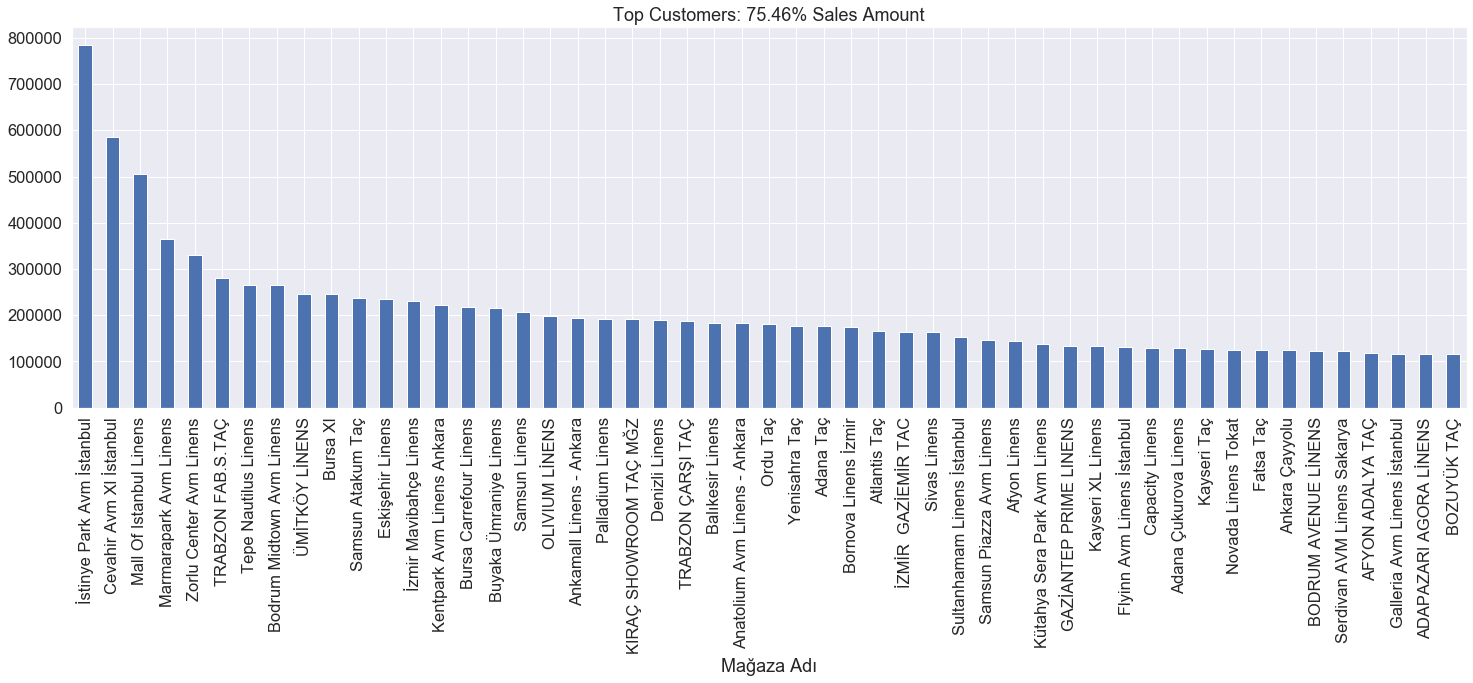

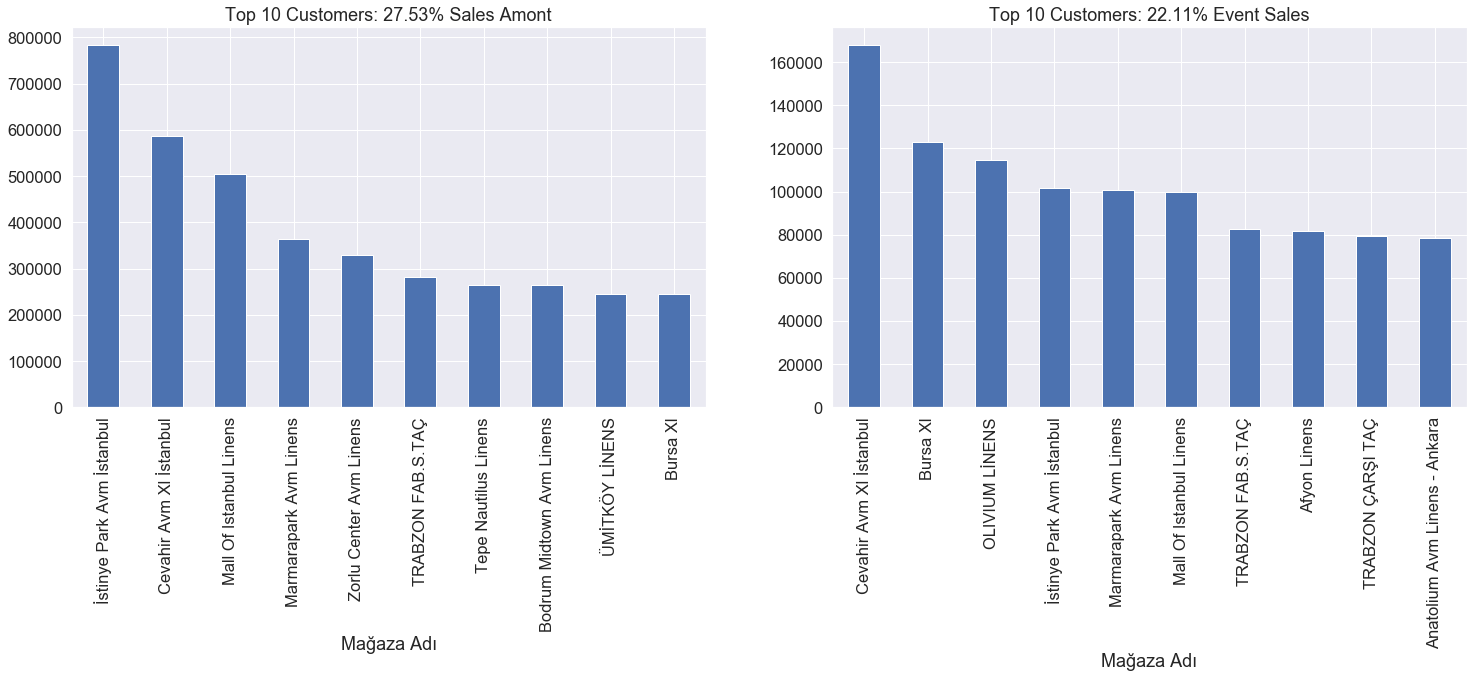

In [12]:
fig = plt.figure(figsize=(25, 7))
PercentSales =  np.round((cs_df.groupby(["Mağaza Adı"]).Quantity.sum().\
                          sort_values(ascending = False)[:51].sum()/cs_df.groupby(["Mağaza Adı"]).\
                          Quantity.sum().sort_values(ascending = False).sum()) * 100, 2)
g = cs_df.groupby(["Mağaza Adı"]).Quantity.sum().sort_values(ascending = False)[:51].\
    plot(kind='bar', title='Top Customers: {:3.2f}% Sales Amount'.format(PercentSales))

fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
PercentSales =  np.round((cs_df.groupby(["Mağaza Adı"]).Quantity.sum().\
                          sort_values(ascending = False)[:10].sum()/cs_df.groupby(["Mağaza Adı"]).\
                          Quantity.sum().sort_values(ascending = False).sum()) * 100, 2)
g = cs_df.groupby(["Mağaza Adı"]).Quantity.sum().sort_values(ascending = False)[:10]\
    .plot(kind='bar', title='Top 10 Customers: {:3.2f}% Sales Amont'.format(PercentSales))
f1 = fig.add_subplot(122)
PercentSales =  np.round((cs_df.groupby(["Mağaza Adı"]).Quantity.count().\
                          sort_values(ascending = False)[:10].sum()/cs_df.groupby(["Mağaza Adı"]).\
                          Quantity.count().sort_values(ascending = False).sum()) * 100, 2)
g = cs_df.groupby(["Mağaza Adı"]).Quantity.count().sort_values(ascending = False)[:10].\
    plot(kind='bar', title='Top 10 Customers: {:3.2f}% Event Sales'.format(PercentSales))

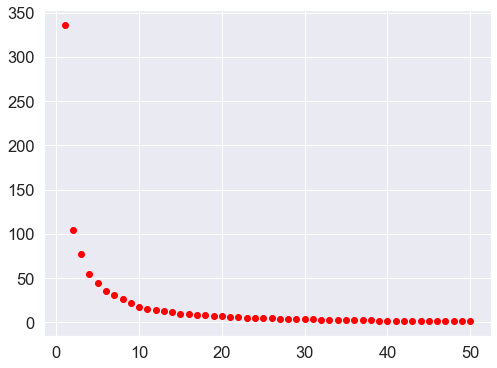

The best K sugest:  12


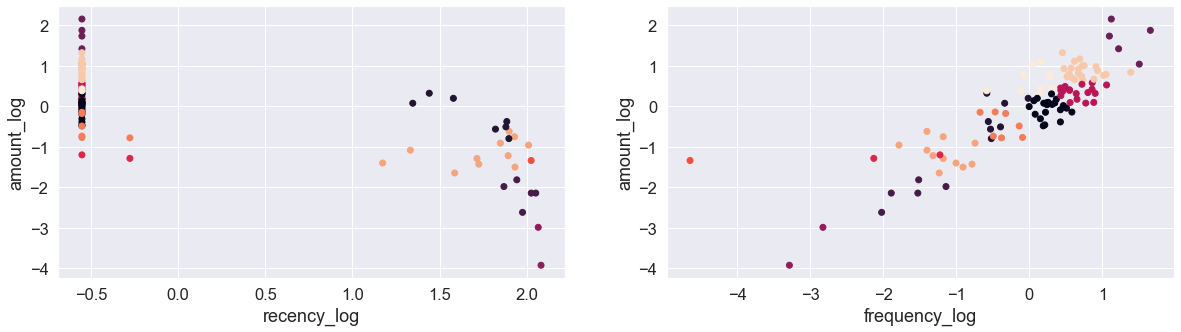

In [21]:
### K   Means Clustering

cl = 50
corte = 0.1

anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(X_scaled)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

# Create a kmeans model with the best K.
print('The best K sugest: ',K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(X_scaled)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model.labels_

# And we'll visualize it:
#plt.scatter(X_scaled[:,0], X_scaled[:,1], c=model.labels_.astype(float))
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = X_scaled[:,1], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[0])
ax = fig.add_subplot(122)
plt.scatter(x = X_scaled[:,2], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[2])
ax.set_ylabel(feature_vector[0])

plt.show()    



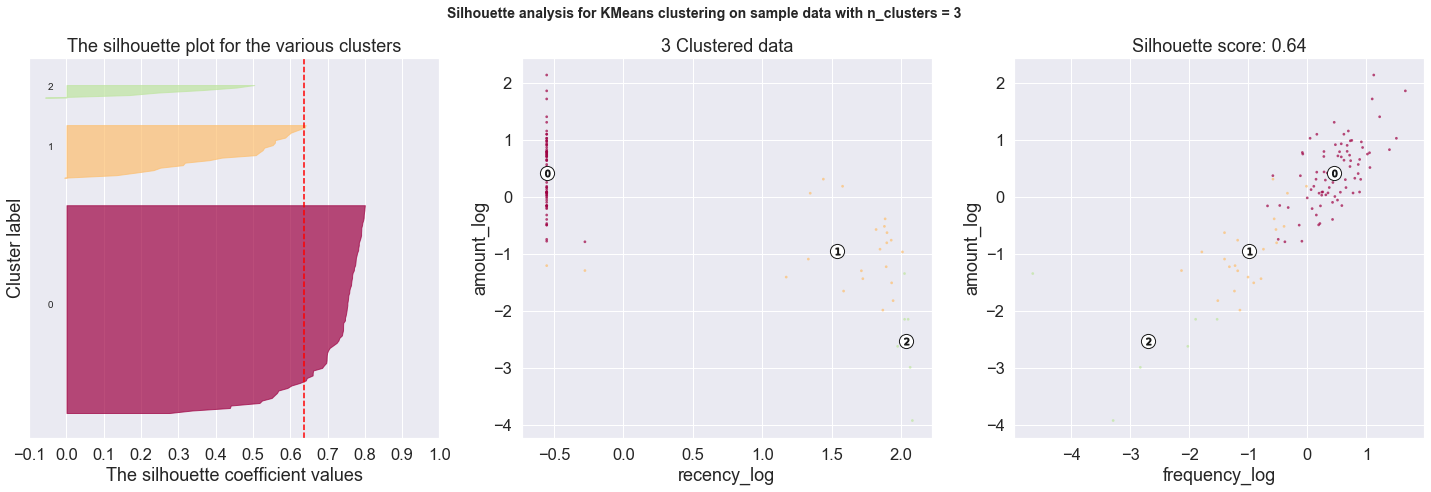

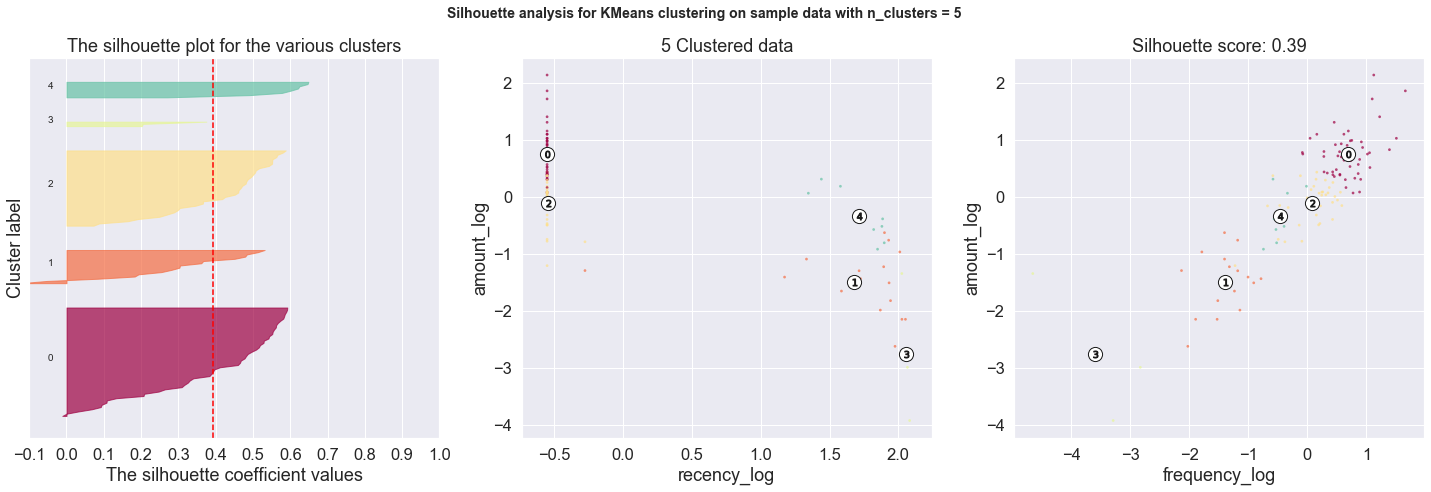

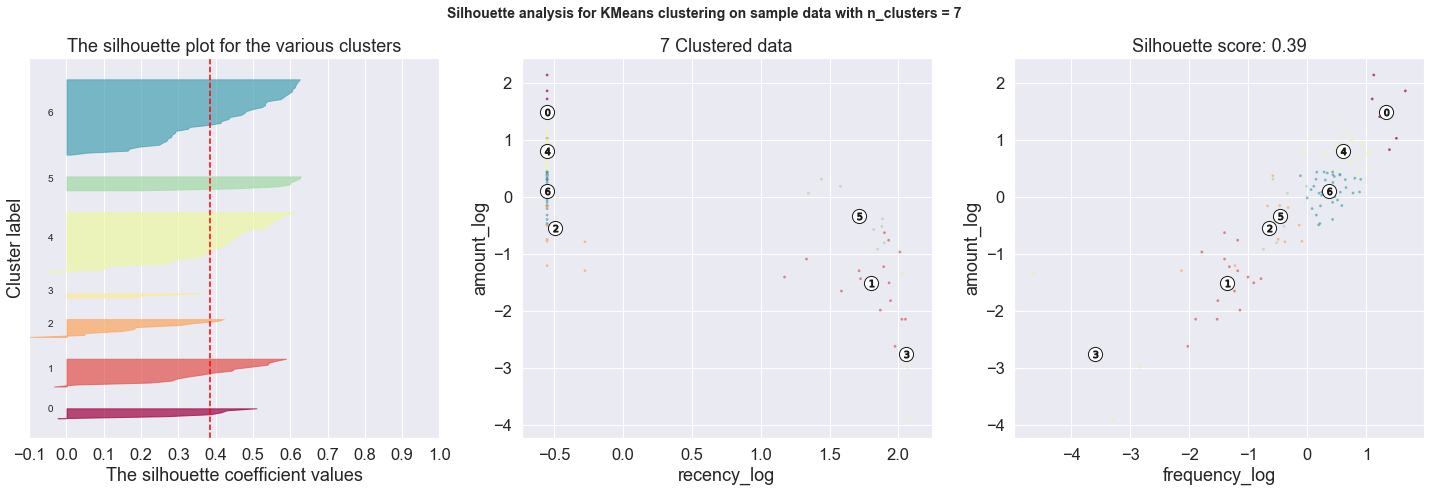

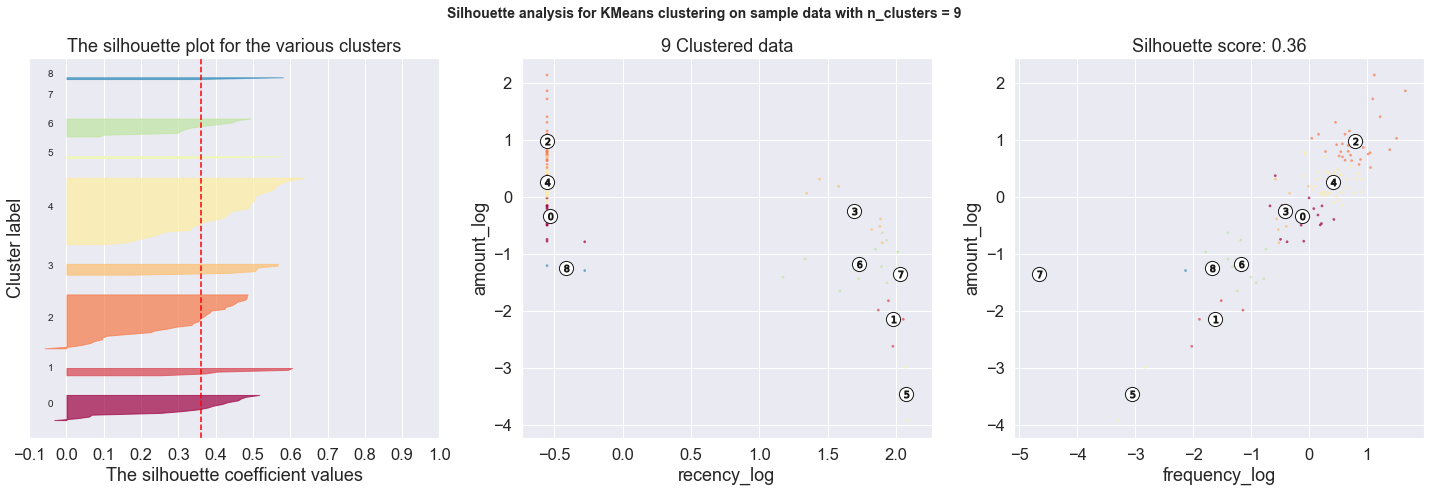

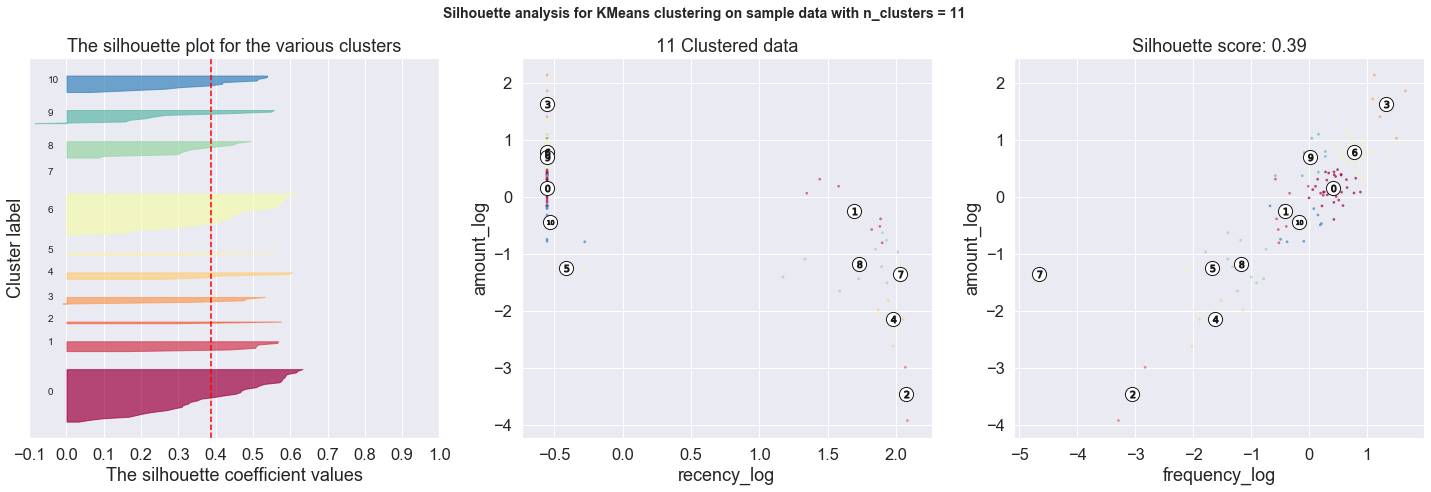

In [22]:
#Silhouette analysis on K-Means clustering¶


cluster_centers = dict()

for n_clusters in range(3,K_best+1,2):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    
    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_vector[x])
    ax2.set_ylabel(feature_vector[y])

    x = 2
    ax3.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_vector[x])
    ax3.set_ylabel(feature_vector[y])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [27]:
#Clusters Center:¶

features = ['Quantity',  'recency',  'frequency']
for i in range(3,K_best+1,2):
    print("for {} clusters the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)


for 3 clusters the silhouette score is 0.64
Centers of each cluster:
        Quantity     recency     frequency
0  130221.644643    1.008286  22999.748495
1   31046.563928  193.891442   5284.755724
2    5960.194537  678.998286    937.074696
--------------------------------------------------
for 5 clusters the silhouette score is 0.39
Centers of each cluster:
        Quantity     recency     frequency
0  185799.004417    1.000000  29166.140691
1   17496.594605  271.786602   3499.158527
2   74654.856559    1.020002  15603.846726
3    4717.079502  714.055112    381.171454
4   59425.279076  299.283161   9088.916200
--------------------------------------------------
for 7 clusters the silhouette score is 0.39
Centers of each cluster:
        Quantity     recency     frequency
0  400878.194918    1.000000  56074.828637
1   17246.679106  377.086727   3675.892168
2   47547.827932    1.148698   7494.590404
3    4717.079502  714.055112    381.171454
4  194813.088685    1.000000  26779.627180
5  

CustomerID  recency  frequency   Quantity  recency_log  frequency_log  \
0  0010200161      1.0      66870  245717.64          0.0      11.110506   
1  0010200597      1.0      34762  151984.65          0.0      10.456280   
2  0010201787      1.0      77997  586222.95          0.0      11.264426   
3  0010201825      1.0      59361  199373.66          0.0      10.991393   
4  0010202265      1.0      45340  784077.27          0.0      10.721945   

   amount_log  clusters_3  clusters_5  clusters_7  
0   12.411938           0           0           0  
1   11.931535           0           0           4  
2   13.281455           0           0           0  
3   12.202936           0           0           0  
4   13.572263           0           0           0

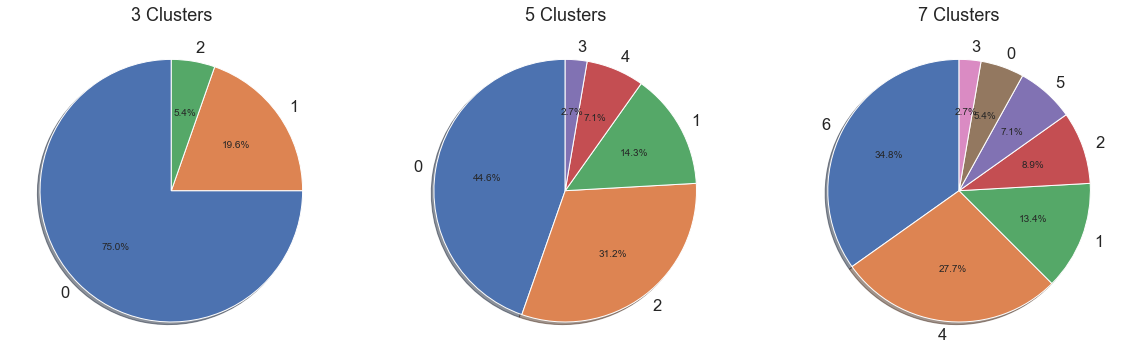

In [28]:
customer_history_df['clusters_3'] = cluster_centers[3]['labels'] 
customer_history_df['clusters_5'] = cluster_centers[5]['labels']
customer_history_df['clusters_7'] = cluster_centers[7]['labels']
display(customer_history_df.head())

fig = plt.figure(figsize=(20,7))
f1 = fig.add_subplot(131)
market = customer_history_df.clusters_3.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('3 Clusters')
f1 = fig.add_subplot(132)
market = customer_history_df.clusters_5.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('5 Clusters')
f1 = fig.add_subplot(133)
market = customer_history_df.clusters_7.value_counts()
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('7 Clusters')
plt.show()

In [29]:
x_data = ['Cluster 0', 'Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5', 'Cluster 6']
colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(22, 80, 57, 0.5)', 'rgba(127, 65, 14, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
cutoff_quantile = 95

for n_clusters in range(3,K_best+1,2):
    cl = 'clusters_' + str(n_clusters)
    for fild in range(0, 3):
        field_to_plot = features[fild]        
        y_data = list()
        ymax = 0
        for i in np.arange(0,n_clusters):
            y0 = customer_history_df[customer_history_df[cl]==i][field_to_plot].values
            y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
            if ymax < max(y0): ymax = max(y0)
            y_data.insert(i, y0)

        traces = []

        for xd, yd, cls in zip(x_data[:n_clusters], y_data, colors[:n_clusters]):
                traces.append(go.Box(y=yd, name=xd, boxpoints=False, jitter=0.5, whiskerwidth=0.2, fillcolor=cls,
                    marker=dict( size=1, ),
                    line=dict(width=1),
                ))

        layout = go.Layout(
            title='Difference in {} with {} Clusters and {:1.2f} Score'.\
            format(field_to_plot, n_clusters, cluster_centers[n_clusters]['silhouette_score']),
            yaxis=dict( autorange=True, showgrid=True, zeroline=True,
                dtick = int(ymax/10),
                gridcolor='black', gridwidth=0.1, zerolinecolor='rgb(255, 255, 255)', zerolinewidth=2, ),
            margin=dict(l=40, r=30, b=50, t=50, ),
            paper_bgcolor='white',
            plot_bgcolor='white',
            showlegend=False
        )

        fig = go.Figure(data=traces, layout=layout)
        py.offline.iplot(fig)

ValueError: max() arg is an empty sequence

In [30]:
customer_history_df

CustomerID  recency  frequency   Quantity  recency_log  frequency_log  \
0    0010200161      1.0      66870  245717.64          0.0      11.110506   
1    0010200597      1.0      34762  151984.65          0.0      10.456280   
2    0010201787      1.0      77997  586222.95          0.0      11.264426   
3    0010201825      1.0      59361  199373.66          0.0      10.991393   
4    0010202265      1.0      45340  784077.27          0.0      10.721945   
..          ...      ...        ...        ...          ...            ...   
107  0010207033      1.0      15453   95811.00          0.0       9.645558   
108  0010207264      1.0      12607   49959.55          0.0       9.442007   
109  0010207299      1.0       8796   38508.64          0.0       9.082052   
110  0010207366      1.0       7318   71101.04          0.0       8.898092   
111  0010207562      1.0       4191   23758.26          0.0       8.340695   

     amount_log  clusters_3  clusters_5  clusters_7  
0     12.411938           0           0           0  
1     11.931535           0           0           4  
2     13.281455           0           0           0  
3     12.202936           0           0           0  
4     13.572263           0           0           0  
..          ...         ...         ...         ...  
107   11.470133           0           2           6  
108   10.818969           0           2           2  
109   10.558638           0           2           2  
110   11.171857           0           2           2  
111   10.075686           1           2           2  

[112 rows x 10 columns]

In [35]:
items = list(cs_df.StockCode.unique())
grouped = cs_df.groupby('InvoiceNo')
transaction_level = grouped.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','StockCode']]
transaction_dict = {item:0 for item in items}
output_dict = dict()
temp = dict()


In [ ]:
for rec in transaction_level.to_dict('records'):
    invoice_num = rec['InvoiceNo']
    items_list = rec['StockCode']
    transaction_dict = {item:0 for item in items}
    transaction_dict.update({item:1 for item in items if item in items_list})
    temp.update({invoice_num:transaction_dict})

new = [v for k,v in temp.items()]
transaction_df = pd.DataFrame(new)